In [1]:
#import os
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import datetime
#from ggplot import *
#from  sklearn.model_selection import train_test_split
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split, cross_val_score 
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor

In [2]:
os.getcwd()

'C:\\Users\\Owner'

In [3]:
os.chdir('C:/chann/ds/edwisor/cab fare pred/train_cab')

In [4]:
data=pd.read_csv("train_cab.csv")

In [5]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
data.fare_amount.head(10)

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
5    12.1
6     7.5
7    16.5
8     NaN
9     8.9
Name: fare_amount, dtype: object

In [7]:
#Missing value Analysis
data.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [8]:
data.shape

(16067, 7)

In [9]:
data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
#print(test.head())
data.head(20)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [11]:
# As the missing_percentage is less than 1% we drop the observations containing missing_values
data = data.dropna()
data.shape

(15988, 7)

In [13]:
data.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

C:\Users\Owner\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


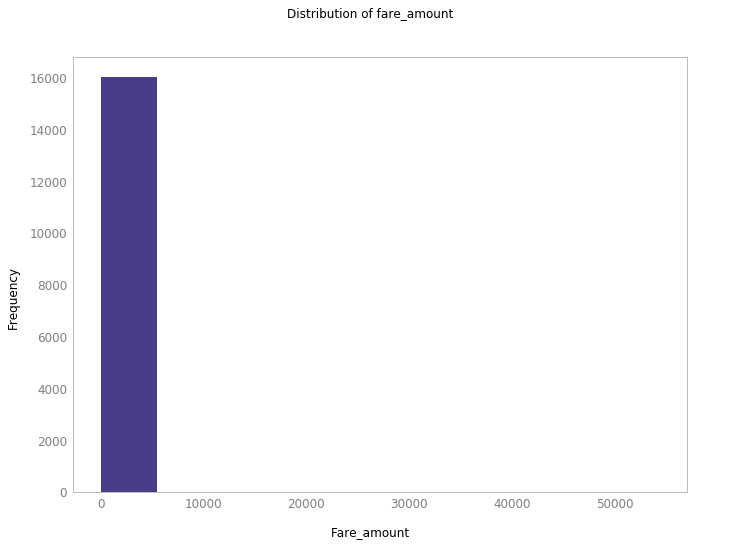

<ggplot: (185254921462)>

In [14]:
data['fare_amount']=data.fare_amount.str.replace('-','').astype(float)
#Histogram of fare_amount
ggplot(data, aes(x = 'fare_amount')) + geom_histogram(fill="DarkSlateBlue", colour = "black") +\
    geom_density() +\
    theme_bw() + xlab("Fare_amount") + ylab("Frequency") + ggtitle("Distribution of fare_amount") +\
    theme(text=element_text(size=20))


In [15]:
data['fare_amount'].describe()

count    15988.000000
mean        15.057238
std        431.199424
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [16]:
# the standard taxi begins at 2
data = data[data['fare_amount'] > 2]
data.shape

(15985, 7)

In [17]:
#Excluding values other than these ranges
# for latitude range : -90<value<90
#for longitude raange : -180<value<180
data=data.drop(((data[data['pickup_longitude']<-180]) | (data[data['pickup_longitude']>180])).index,axis=0)
data=data.drop(((data[data['dropoff_longitude']<-180]) | (data[data['dropoff_longitude']>180])).index,axis=0)
data=data.drop(((data[data['pickup_latitude']<-90])| (data[data['pickup_latitude']>90])).index,axis=0)
data=data.drop(((data[data['dropoff_latitude']<-90])| (data[data['dropoff_latitude']>90])).index,axis=0)
data.shape

(15984, 7)

In [18]:
#Removing observations whoose pickup and dropoff latitude and londitude are same
data = data[(data['pickup_latitude'] != data['dropoff_latitude']) & (data['pickup_longitude'] != data['dropoff_longitude'])]
data.shape

(15522, 7)

In [19]:
# Removing the outliers of fare_amount
mean =data['fare_amount'].mean()
sd = data['fare_amount'].std()
data = data[(data['fare_amount'] > mean - 3*sd) & (data['fare_amount'] < mean + 3*sd)]
data.shape

(15520, 7)

In [20]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15520.000000,15520.000000,15520.000000,15520.000000,15520.000000,15520.000000
mean,11.395505,-73.854092,40.657471,-73.858392,40.663280,2.636638
std,11.182403,3.369775,2.858392,3.306428,2.819888,61.769259
min,2.500000,-74.438233,-74.006893,-74.227047,-74.006377,0.000000
25%,6.000000,-73.992371,40.736526,-73.991370,40.736259,1.000000
50%,8.500000,-73.982047,40.753299,-73.980567,40.754216,1.000000
75%,12.500000,-73.968131,40.767792,-73.965486,40.768308,2.000000
max,453.000000,40.766125,41.366138,40.802437,41.366138,5345.000000


C:\Users\Owner\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


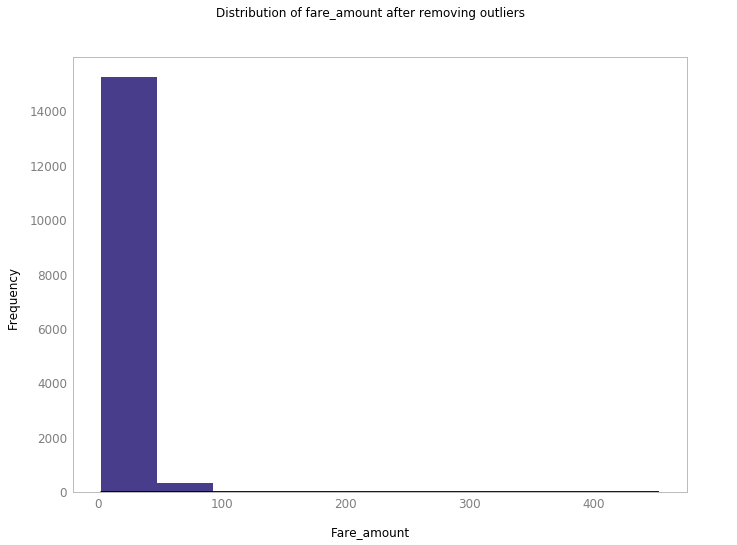

<ggplot: (185255404934)>

In [21]:
#Histogram 
ggplot(data, aes(x = 'fare_amount')) + geom_histogram(fill="DarkSlateBlue", colour = "black") +\
    geom_density() +\
    theme_bw() + xlab("Fare_amount") + ylab("Frequency") + ggtitle("Distribution of fare_amount after removing outliers") +\
    theme(text=element_text(size=20))

In [22]:
data['passenger_count']=data['passenger_count'].astype(int)

In [23]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15520 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          15520 non-null float64
pickup_datetime      15520 non-null object
pickup_longitude     15520 non-null float64
pickup_latitude      15520 non-null float64
dropoff_longitude    15520 non-null float64
dropoff_latitude     15520 non-null float64
passenger_count      15520 non-null int32
dtypes: float64(5), int32(1), object(1)
memory usage: 909.4+ KB


(15520, 7)

In [24]:
# Number of passengers cannot be 0 and maximum number of passengers that can fit in a car is 6 
data=data[ (data['passenger_count']<=6) & (data['passenger_count']>=1) ]
data.shape

(15446, 7)

C:\Users\Owner\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


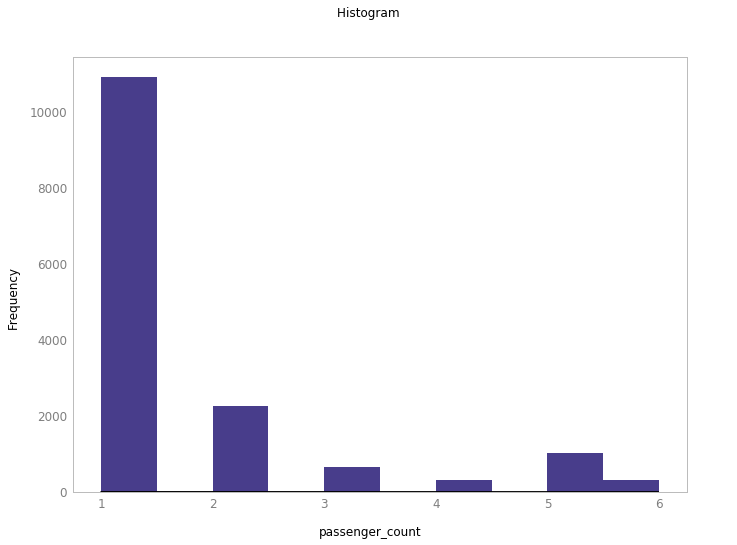

<ggplot: (185255197139)>

In [25]:
#Histogram  of passenger_count
ggplot(data, aes(x = 'passenger_count')) + geom_histogram(fill="DarkSlateBlue", colour = "black") +\
    geom_density() +\
    theme_bw() + xlab("passenger_count") + ylab("Frequency") + ggtitle("Histogram ") +\
    theme(text=element_text(size=20))

Histogram says majority are single passenger travellers

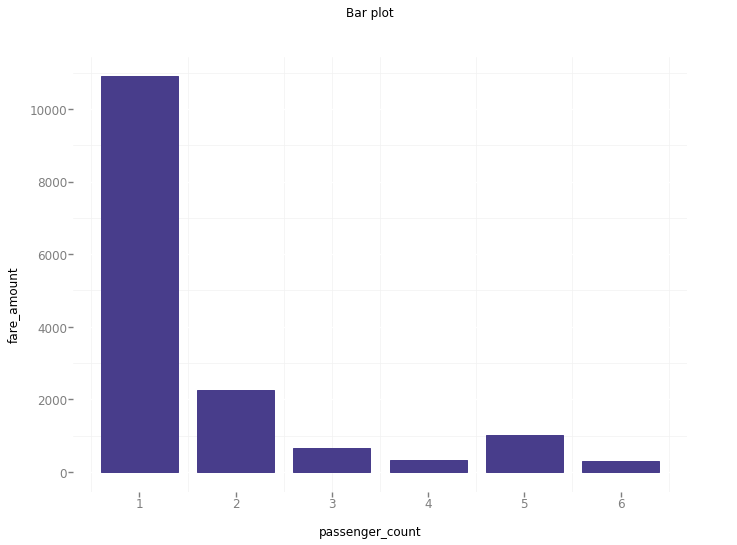

<ggplot: (-9223371851599522830)>

In [26]:
ggplot(data, aes(x= 'passenger_count',y= 'fare_amount')) + geom_bar(fill='DarkSlateBlue') +\
   theme_bw() + xlab("passenger_count") + ylab("fare_amount") + ggtitle("Bar plot")

In [27]:
# Defining function to extract features from pickup_datetime variable
def date_columns(data):
    data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'],errors='coerce', yearfirst=True)
    data['year'] = data['pickup_datetime'].dt.year
    data['month'] = data['pickup_datetime'].dt.month
    data['day'] = data['pickup_datetime'].dt.day
    data['weekday'] = data['pickup_datetime'].dt.weekday
    data['hour'] = data['pickup_datetime'].dt.hour

In [28]:
date_columns(data)

In [29]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009.0,6.0,15.0,0.0,17.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010.0,1.0,5.0,1.0,16.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011.0,8.0,18.0,3.0,0.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012.0,4.0,21.0,5.0,4.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010.0,3.0,9.0,1.0,7.0


In [30]:
data['day']=data['day'].astype('category')
data['hour']=data['hour'].astype('category')
data['year']=data['year'].astype('category')
data['month']=data['month'].astype('category')
data['weekday']=data['weekday'].astype('category')
data['passenger_count']=data['passenger_count'].astype('category')

In [31]:
data.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count            category
year                       category
month                      category
day                        category
weekday                    category
hour                       category
dtype: object

In [32]:
test=pd.read_csv('test.csv')
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [33]:
#We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula
def haversine_distance(lat1, long1, lat2, long2):
    k = [data,test]
    for i in k:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['distance'] = d
    return d

In [34]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [35]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
count,15446.000000,15446.000000,15446.000000,15446.000000,15446.000000,15446.000000
mean,11.406431,-73.863077,40.662310,-73.857827,40.662864,15.124982
std,11.201492,3.271594,2.827619,3.314328,2.826628,312.569573
min,2.500000,-74.438233,-74.006893,-74.227047,-74.006377,0.000202
25%,6.000000,-73.992372,40.736528,-73.991367,40.736269,1.279019
50%,8.500000,-73.982049,40.753312,-73.980557,40.754227,2.196105
75%,12.500000,-73.968126,40.767799,-73.965453,40.768311,3.947530
max,453.000000,40.766125,41.366138,40.802437,41.366138,8667.542104


In [36]:
(data['distance']==0).sum()

0

In [37]:
# No one chooses to travel in cab for more than 50km and for less than  300 meters
data=data[(data.distance <50) & (data.distance >.3)]
data.shape

(15204, 13)

In [ ]:
# Model development

In [39]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010.0,3.0,9.0,1.0,7.0,1.999157


In [40]:

#OUTLIERS in fare_amount
# As the distance limit was 50km and average fare could be 1.5 $ per KM
value= 1.5 * 50 # 75 $ would be the maximum fare.
data=data[data['fare_amount'] <75]
data.shape

(15184, 13)

In [41]:
# correlation between fare and distance 
data.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
fare_amount,1.000000,0.009126,-0.004129,0.008179,-0.003639,0.906291
pickup_longitude,0.009126,1.000000,-0.994245,0.999868,-0.994221,0.003625
pickup_latitude,-0.004129,-0.994245,1.000000,-0.994231,0.999919,-0.000172
dropoff_longitude,0.008179,0.999868,-0.994231,1.000000,-0.994208,0.002937
dropoff_latitude,-0.003639,-0.994221,0.999919,-0.994208,1.000000,0.000809
distance,0.906291,0.003625,-0.000172,0.002937,0.000809,1.000000


In [253]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
count,15184.000000,15184.000000,15184.000000,15184.000000,15184.000000,15184.000000
mean,11.240219,-73.917826,40.695131,-73.916568,40.695786,3.394719
std,8.970333,2.535017,2.485324,2.535149,2.484965,3.588435
min,2.500000,-74.438233,-74.006893,-74.227047,-73.994392,0.301206
25%,6.000000,-73.992390,40.736543,-73.991354,40.736333,1.308864
50%,8.500000,-73.982093,40.753300,-73.980559,40.754262,2.219709
75%,12.500000,-73.968225,40.767798,-73.965571,40.768338,3.961010
max,73.300000,40.766125,41.035688,40.802437,41.028363,39.476975


In [42]:
#Feature selection 
data=data[['fare_amount','distance','hour','month','year','weekday','day','passenger_count']]

In [43]:
data.distance=np.round(data.distance,2)

In [44]:
y=data['fare_amount']
x=data.drop(columns=['fare_amount','distance'])

In [45]:
x.columns

Index(['hour', 'month', 'year', 'weekday', 'day', 'passenger_count'], dtype='object')

In [46]:
cat_columns=[ 'hour', 'month', 'year', 'weekday', 'day',
       'passenger_count']

In [47]:
#One hot encoding
x2=pd.get_dummies(x,columns=cat_columns)

In [48]:
x2.head()
print(y.shape)
x2.shape

(15184,)


(15184, 87)

In [49]:
x2['distance']=data['distance']
x2.shape

(15184, 88)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, random_state=5, test_size = .2)


In [51]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
y_pred = lr.predict(x_test)
error = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
error

3.502762389323195

In [53]:
randomForest = RandomForestRegressor(random_state=8)
randomForest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=8, verbose=0, warm_start=False)

In [54]:
randomForestPredict = randomForest.predict(x_test)
randomForest_mse = mean_squared_error(y_test, randomForestPredict)
randomForestMSE = np.sqrt(randomForest_mse)
randomForestMSE

3.706619116696436

Linear regression performs well as the error metrics rmse is 3.5 
So, we fix linear regression as your model


In [55]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2.323259
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,5.387301


In [56]:
date_columns(test)

In [57]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,weekday,hour
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323259,2015,1,27,1,13
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


In [58]:
data['day']=data['day'].astype('category')
data['hour']=data['hour'].astype('category')
data['year']=data['year'].astype('category')
data['month']=data['month'].astype('category')
data['weekday']=data['weekday'].astype('category')
data['passenger_count']=data['passenger_count'].astype('category')

In [59]:
test['distance'].median()

2.2174117711385883

In [60]:
test['distance'][test['distance'] >50]=test['distance'].median()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
test['distance'].describe()

count    9914.000000
mean        3.406242
std         3.611833
min         0.000000
25%         1.298277
50%         2.217286
75%         4.043992
max        33.604366
Name: distance, dtype: float64

In [62]:
#Feature selection 
test_dist=test['distance']
test=test[['hour','month','year','weekday','day','passenger_count']]
test.head()

,hour,month,year,weekday,day,passenger_count
0,13,1,2015,1,27,1
1,13,1,2015,1,27,1
2,11,10,2011,5,8,1
3,21,12,2012,5,1,1
4,21,12,2012,5,1,1


In [63]:
#One hot encoding
x3=pd.get_dummies(test,columns=cat_columns)

In [64]:
x3.head()
x3['distance']=test_dist

In [65]:
# Using the LR model to get the fare_amount of test data
y_pred = lr.predict(x3)

In [66]:
# Predicted fares of test data
y_pred

array([10.6661377 , 10.89916992,  4.67749023, ..., 47.95239258,
       22.29406738,  7.15930176])

In [67]:
# Mean of predicted fares of test data
np.mean(y_pred)

11.263951193644246